In [56]:
from mdgo.core import MdRun
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from MDAnalysis.analysis.distances import distance_array
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [57]:
f_5_nopcm = MdRun("/Users/th/Downloads/os3_project/sila_5/sila_5_nopcm/sila_5_nopcm.data",
                  "/Users/th/Downloads/os3_project/sila_5/sila_5_nopcm/sila_5_nopcm_nvt.dcd",
                  "/Users/th/Downloads/os3_project/sila_5/sila_5_nopcm/sila_5_nopcm_unwrapped_nvt.dcd",
                  800, 10, "1s3mn 5% nopcm",
                  {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                   "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent":"type 2 or type 8 or type 22"})

f_5_pcm = MdRun("/Users/th/Downloads/os3_project/sila_5/sila_5_pcm/sila_5_pcm.data",
                "/Users/th/Downloads/os3_project/sila_5/sila_5_pcm/sila_5_pcm_nvt.dcd",
                "/Users/th/Downloads/os3_project/sila_5/sila_5_pcm/sila_5_pcm_unwrapped_nvt.dcd",
                800, 10, "1s3mn 5% pcm",
                {"cation": "type 32", "anion": "type 30", "anion-F": "type 31", "EC": "type 2",
                 "DEC": "type 8", "EMC": "type 22", "os3": "type 33", "solvent": "type 2 or type 8 or type 22"})

/Users/th/Documents/mdgo/mdgo/core.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


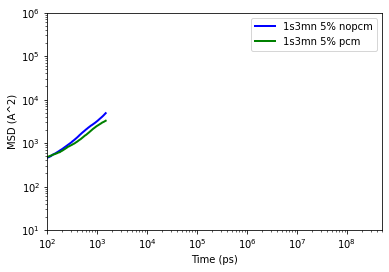

In [53]:
# start and end of fitting region selection (linear regime)
start = int(100/10)
end = int(1500/10)
f_5_nopcm.plot_cond_array(start, end, f_5_pcm)

In [54]:
f_5_nopcm.get_conductivity(start, end)

Conductivity of 1s3mn 5% nopcm: 1.319440481531852 ± 0.0037197549440710757 mS/cm


In [55]:
start = int(100/10)
end = int(5000/10)
f_5_pcm.get_conductivity(start, end)

Conductivity of 1s3mn 5% pcm: 1.0688840803214958 ± 0.004955764414757261 mS/cm


In [58]:
run_start = int(6000/10)
run_end = int(11000/10)

In [59]:
f_5_nopcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                        {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                        run_start, run_end)

,species in first solvation shell,1s3mn 5% nopcm
0,anion,0.720055
1,anion-F,0.879531
2,EC,2.176910
3,DEC,1.202745
4,EMC,1.284676
5,os3,0.045807


In [60]:
f_5_pcm.rdf_integral(["anion", "anion-F", "EC", "DEC", "EMC", "os3"],
                     {"anion": 5, "anion-F": 3, "EC": 3, "DEC": 3, "EMC": 3, "os3": 3},
                     run_start, run_end)

,species in first solvation shell,1s3mn 5% pcm
0,anion,0.738759
1,anion-F,0.931214
2,EC,1.950607
3,DEC,1.087090
4,EMC,1.348552
5,os3,0.228703


In [61]:
f_5_nopcm.coordination_one_species("os3", 3, run_start, run_end)

,Num of os3 within 3 Å,Percentage
0,0,95.4510%
1,1,4.5172%
2,2,0.0317%


In [62]:
f_5_pcm.coordination_one_species("os3", 3, run_start, run_end)

,Num of os3 within 3 Å,Percentage
0,0,79.0400%
1,1,19.0897%
2,2,1.8303%
3,3,0.0400%


In [63]:
f_5_nopcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,39.6510%
1,cip,34.1848%
2,agg,26.1641%


In [64]:
f_5_pcm.shell_simple("anion", 5, run_start, run_end)

,solvation structure,Percentage
0,ssip,42.7434%
1,cip,31.7421%
2,agg,25.5145%
